# Stock Market Analysis using Supervised Machine Learning

Stock market or Share market is one of the most complicated and sophisticated way to do business. Small ownerships, brokerage corporations, banking sector, all depend on this very body to make revenue and divide risks; a very complicated model. However, we use machine learning algorithm to predict the future stock price for exchange by using open source libraries and preexisting algorithms to help make this unpredictable format of business a little more predictable. We shall see how this simple implementation will bring acceptable results. The outcome is completely based on numbers and assumes a lot of axioms that may or may not follow in the real world so as the time of prediction.

## Check out the Data

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
#import quandl
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

### Quandl Data
In this stage, we shall look at the raw data available to us and study it in-order to identify suitable attributes for the prediction of our selected label. Now the data that we’re going to use for our program is taken from www.quandl.com, a premier dataset providing platform.

### Get the Data 

Data Loading
The attributes of the dataset include:
Open (Opening price of Stock)
High (Highest price possible at an instance of time)
Low (Lowest price possible at an instance of time)
Close (Closing price of stock)
Volume (Total times traded during a day)
Split ratio
Adj. Open
Adj. High

Adj. Close

We select the attribute “Close” to be our label (The
variable which we shall be predicting) and use “Adj. Open,
Adj. High, Adj. Close, Adj. Low and Adj. Volume” to
extract the features that will help us predict the outcome
better

In [3]:
# Set start and end date for stock prices
start_date = datetime.date(2009, 3,8)
end_date = datetime.date.today()
# Load data from Quandl
# data = quandl.get('FSE/SAP_X', start_date=start_date, end_date=end_date)
# Save data to CSV file
data = pd.read_csv("data/sap_stock.csv", low_memory = False, skiprows = 1, encoding = "ISO-8859-1")
# data.to_csv('data/sap_stock.csv')     
print("The GTD dataset has {} samples with {} features.".format(*data.shape))

The GTD dataset has 2550 samples with 11 features.


In [4]:
data.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [5]:
# Check data types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 11 columns):
Date                     2550 non-null object
Open                     2242 non-null float64
High                     2543 non-null float64
Low                      2543 non-null float64
Close                    2550 non-null float64
Change                   11 non-null float64
Traded Volume            2504 non-null float64
Turnover                 2497 non-null float64
Last Price of the Day    0 non-null float64
Daily Traded Units       0 non-null float64
Daily Turnover           7 non-null float64
dtypes: float64(10), object(1)
memory usage: 219.3+ KB


In [6]:
# Get descriptive statistics summary of data set 
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


In [7]:
# Display features in data set
data.columns
#data.drop(['Date'], axis = 1) 

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover', 'Last Price of the Day', 'Daily Traded Units',
       'Daily Turnover'],
      dtype='object')

### Select Subset with relevant features

We use the daily closing price **Close** as the value to predict, so we can discard the other features.  

* 'Close' column has numerical data type
* The 'Date' is the index column and contains datetime values

In [8]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Date','Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [9]:
df.head()

,index,Date,Close
0,0,2009-03-09,25.59
1,1,2009-03-10,26.87
2,2,2009-03-11,26.64
3,3,2009-03-12,26.18
4,4,2009-03-13,25.73


In [10]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 3 columns):
index    2550 non-null int64
Date     2550 non-null object
Close    2550 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.9+ KB


In [11]:
# Check for missing values in the columns
df.isna().values.any()


False

## Explore the Data

When we take a look at the price movement over time by simply plotting the *Closing price* vs *Time*, we can already see, that the price continously increases over time and we can also estimate that trend could be linear.

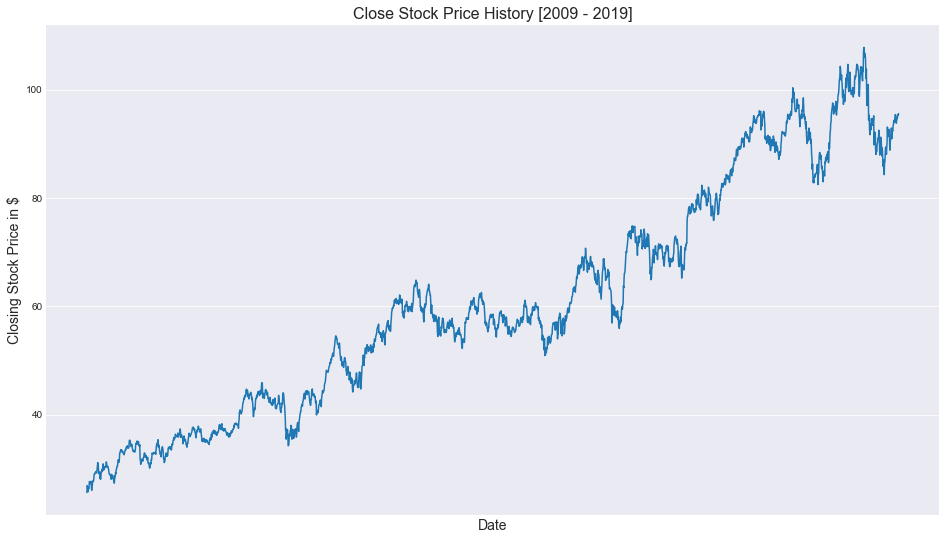

In [12]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

## Linear Regression
 
Our data contains only one **independent variable ($X$)** which represents the *date* and the **dependent variable ($Y$)** we are trying to predict is the *Stock Price*. To fit a line to the data points, which then represents an estimated relationship between $X$ and $Y$, we can use a **Simple Linear Regression**.

The best fit line can be described with  
$$
Y = \beta_0 + \beta_1 X
$$

where  
* $Y$ is the predicted value of the dependent variable
* $\beta_0$ is the y-intercept
* $\beta_1$ is the slope
* $X$ is the value of the independent variable

The goal is to find such coefficients $\beta_0$ and $\beta_1$ that the **Sum of Squared Errors**, which represents the difference between each point in the dataset with it’s corresponding predicted value outputted by the model, is minimal.

### Training a Linear Regression Model

### Train Test Split

Training of a model is very straightforward. You only need to make sure that the data is consistent, coherent and is available in great abundance. A large set of training data contributes to a stronger and more accurate classifier which ultimately increases the overall accuracy. Testing is also a very straightforward process. Make sure your test data is at least 20% of the size of your training data. It is important to understand that testing is the test of you classifiers accuracy and is sometimes observed to be inversely proportional to a classifiers score. However, the accuracy of the classifier has no dependency or correlation with testing. It sometimes seem so, but testing does not have any relationship with the classifier.

In [13]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [14]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

### Create and Train the Model

In [15]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [16]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [17]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation

In [18]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.027549052593612552
Intercept:  25.797227321073017


Interpreting the coefficients:

* The **slope** coefficient tells us that with a 1 unit increase in **date** the **closing price** increases by 0.0276 $
* The **intercept** coefficient is the price at wich the **closing price** measurement started, the stock price value at date zero

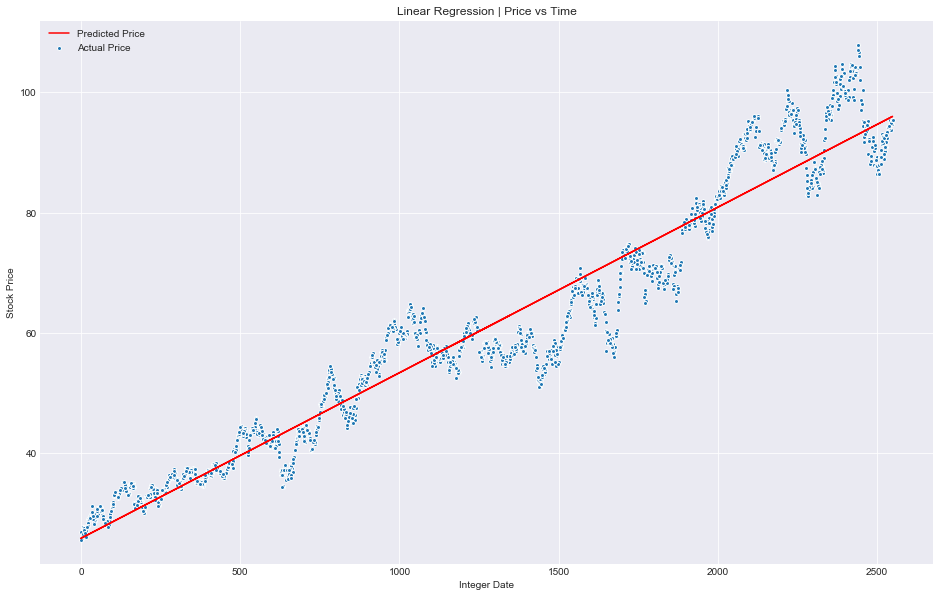

In [19]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Prediction from our Model

In [20]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [21]:
# Generate array with predicted values
y_pred = model.predict(X_test)
print(y_pred[0:25])
#df['Prediction'] = y_pred[:24]

[59.46216959 36.43116162 44.22754351 39.59930267 95.57897754 53.07078939
 76.04669925 75.96405209 39.26871404 57.53373591 86.26739776 35.93527868
 91.39152155 79.95866472 94.44946638 78.71895735 90.48240281 44.99891698
 60.39883738 59.35197338 50.94951234 78.60876114 34.86086562 78.96689883
 86.18475061]


## Regression Evaluation

Let's have a look at how the predicted values compare with the actual value on random sample from our data set.

In [22]:
# Get number of rows in data set for random sample
#df['Prediction']=y_pred
df.shape

(2550, 3)

In [23]:
print(type(y_pred))
# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]
df_sample['Prediction']=y_pred[0:25]

<class 'numpy.ndarray'>


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [24]:
#df['Prediction']=y_pred
df_sample.head()

,index,Date,Close,Prediction
40,40,2009-05-04,29.34,59.462170
180,180,2009-11-16,32.85,36.431162
213,213,2009-12-31,33.00,44.227544
475,475,2011-01-07,38.08,39.599303
508,508,2011-02-23,43.12,95.578978


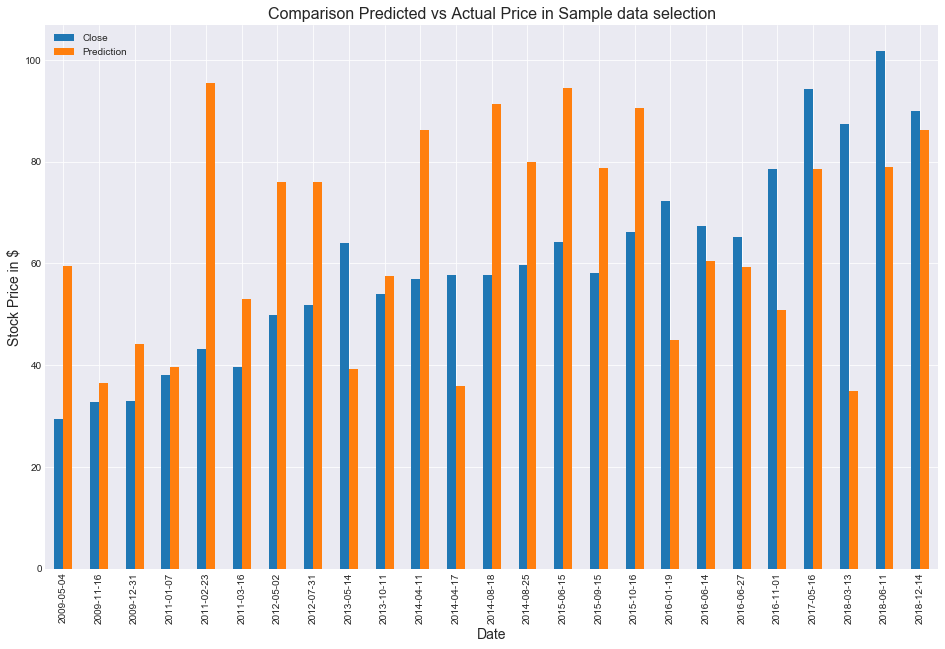

In [25]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

We can see some larger variations between predicted and actual values in the random sample.  
Let's see how the model performed over the whole test data set. 

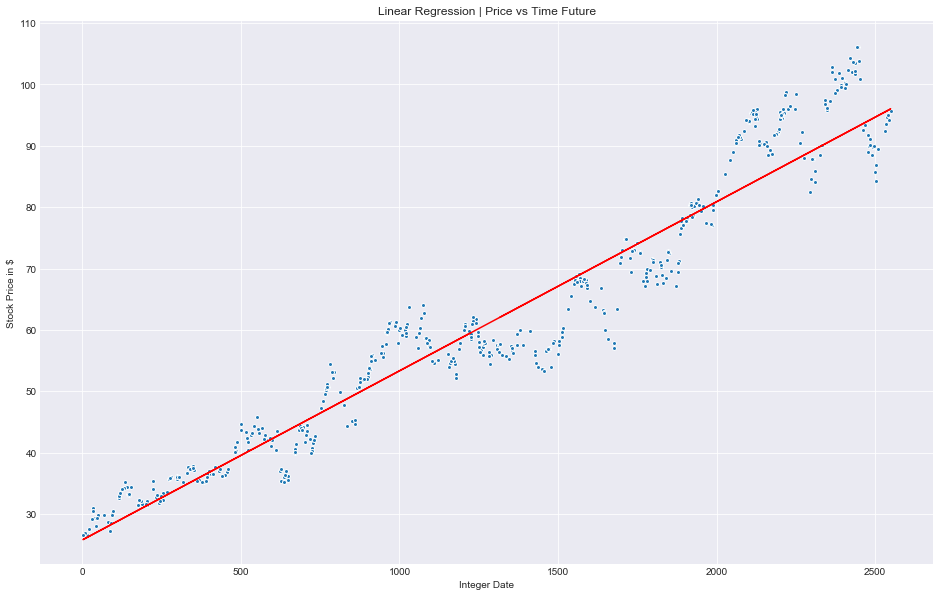

In [26]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time Future')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

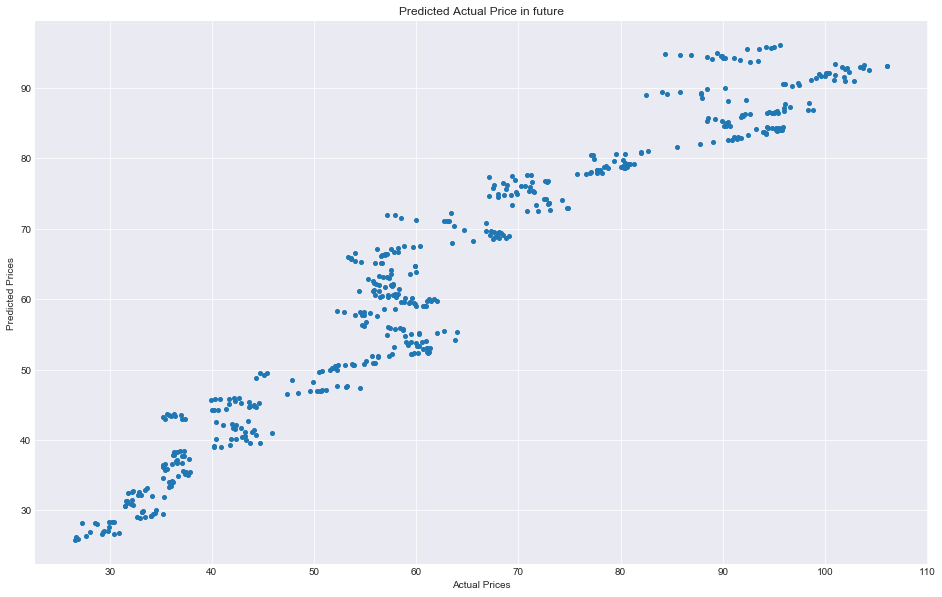

In [27]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted Actual Price in future')

plt.show()

The data points are mostly close to a diagonal, which indicates, that the predicted values are close to the actual value and the model's performance is largerly quite good.  
Yet there are some areas, around 55 to 65, the model seems to be quite random and shows no relationship between the predicted and actual value.  
Also in the area around 85 - 110 the data point are spread out quite heavily and the predictions don't cover the values above 100.

#### Residual Histogram

The residuals are nearly normally distributed around zero, with a slight skewedness to the right. 

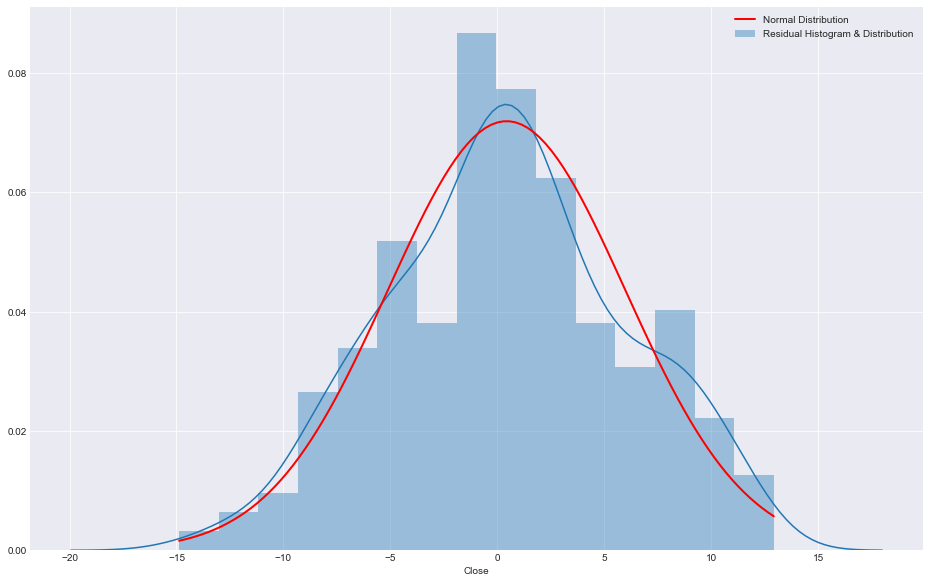

In [28]:
# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [29]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [30]:
df.head()

,index,Date,Close,Prediction
0,0,2009-03-09,25.59,25.797227
1,1,2009-03-10,26.87,25.824776
2,2,2009-03-11,26.64,25.852325
3,3,2009-03-12,26.18,25.879874
4,4,2009-03-13,25.73,25.907424


### Error Evaluation Metrics

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
$$
\frac{1}{N} \sum_{i = 1}^{N} |y_i - \hat{y}_i|
$$

**Mean Squared Error (MSE)** is the mean of the squared errors:
$$
\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
$$
\sqrt{\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2}
$$

All of these are **cost functions** we want to minimize.

In [31]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [32]:
# Statistical summary of test data
df['Close'].describe()

count    2550.000000
mean       60.995955
std        21.097480
min        25.590000
25%        42.950000
50%        58.015000
75%        77.762500
max       107.800000
Name: Close, dtype: float64

In [33]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.439652552362658
Mean Squared Error: 30.991174627384503
Root Mean Squared Error: 5.566971764557865


* The MAE is 3% (of minimum) and 6% (of maximum) of the Closing Price.
* The other two errors are larger, because the errors are squared and have therefore a greater influence on the result.

### Accuracy Evaluation Metrics

To see how accurate our model is, we can calculate the **Coefficient of determination**, which describes the ratio between the total error and the error, that is explained by our model. It's value is between 0 and 1, with 1 meaning 100% of the error is acoounted for by the model. 

**Coefficient of determination**
$$
R^2 = 1 - \frac{RSS}{TSS}
$$

with  

**Residual Sum of Squares (RSS)**
$$
RSS = \sum_{i = 1}^{N} \epsilon_i^2 = \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

**Total Sum of Squares (TSS)**
$$
TSS = \sum_{i = 1}^{N} (y_i - \bar{y}_i)^2
$$


In [34]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9319171473063403


In [35]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9323372535749207

The value of $R^2$ shows that are model accounts for nearly 94% of the differences between the actual stock prices and the predicted prices. 

# SOME COMMON MISTAKES
Let us mention some of the common mistakes made by practitioners in this field, which you are required to avoid

1 Bad annotation of training and testing datasets <br/>

2 Poor understanding of algorithms’ assumptions.

3 Poor understanding of algorithms’ parameters.

4 Failure to understand objective.

5 Not understanding the data.

6 Avoid leakage (Features, information).

7 Not enough data to train the classifier.

8 Using machine learning where it is not necessary.

# CONCLUSIONS
Machine learning as we have seen till now, is a very powerful tool and as evitable, it has some great application. We have seen till now that machine learning is very much dependent upon data. Thus it is important understand that data is quite invaluable and as simple is it may sound, data analysis is not an easy task. Machine learning have found tremendous application and has evolved further into deep learning and neural networks, but the core idea is more or less the same for all of them. This project delivers a smooth insight of how to implement machine learning. There are various ways, methods and techniques available to handle and solve various problems, in different situations imaginable. This project is limited to only supervised machine learning, and tries to explain only the fundamentals of this complex process.